In [1]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist  
(x_train, y_train),(x_test, y_test) = mnist.load_data() # used to load the dataset from keras.

x_train = tf.keras.utils.normalize(x_train, axis=1) # scaling data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scaling data between 0 and 1

model = tf.keras.models.Sequential() 
model.add(tf.keras.layers.Flatten())  # this takes 28x28 pixels and make it 1x784 pixels
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer and softmax is used for probability distribution

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train) # train the model

val_loss, val_acc = model.evaluate(x_test, y_test) # evaluate the sample data with model
print(val_loss) # error in model
print(val_acc) #  accuracy of the model
model.save('num_model1.hdf5')
new_model = tf.keras.models.load_model('num_model1.hdf5')
predictions = new_model.predict(x_test)
print(predictions)

313/313 [==============================] - 1s 3ms/step - loss: 0.1712 - accuracy: 0.9456
0.17121240496635437
0.9455999732017517
[[9.97714778e-06 1.12421425e-07 1.04940867e-04 ... 9.99850869e-01
  2.29390011e-07 1.13551914e-06]
 [3.65658707e-05 1.40959874e-03 9.97798502e-01 ... 1.48547443e-07
  4.68488070e-05 1.43923302e-07]
 [1.80471379e-05 9.95585680e-01 1.63176155e-03 ... 6.23440545e-04
  9.88568296e-04 2.56069179e-05]
 ...
 [1.73836241e-07 2.96348219e-07 2.51293000e-06 ... 1.53122353e-04
  9.19451559e-05 8.71283410e-05]
 [1.11873109e-04 7.09703272e-06 2.57520260e-05 ... 8.92058233e-06
  1.06701010e-03 5.50254754e-07]
 [1.31649198e-04 2.02808860e-06 8.51146178e-05 ... 2.86989263e-07
  7.79563493e-07 2.55640117e-07]]


6


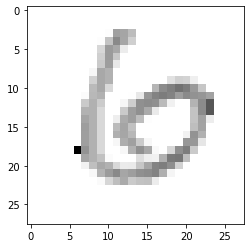

In [2]:
import numpy as np
import matplotlib.pyplot as plt

print(np.argmax(predictions[11]))
plt.imshow(x_test[11],cmap=plt.cm.binary)
plt.show()